# Decision Trees

Various questions are asked at various nodes to ultimately reach a decision.

# Decision Tree Structure

Root node: the basic, uppermost question

Leaf nodes: decisions

Internal nodes: question that leads to leaf nodes

# Decision Trees cont.

A type of supervised learning algorithm where each node represents a choice between different alternatives. This process involves splitting the data up into multiple parts with a list of rules to guide predictions.

Inductive reasoning: go from specific observations to general conclusions. Decision trees are inductive.

Deductive reasoning: specific conclusion that follows general theory.
    1) All men are mortal
    2) Socrates is a man
    Therefore: Socrates is mortal

# GINI Index

A GINI Index essentially quantifies the probability of a randomly selected variable being wrongly classified, or predicted to be in the wrong class. If all the elements belong to a single class, then it can be called pure, meaning the index would read 0. If the items are unevenly distributed, this index rises. 

One of its use cases is defining decision trees. The GINI Index can help define a branch of a decision tree by measuring the randomness, impurity, or entropy from the topmost root node of a tree down to the leaves where decisions are made to find different splitting measures.

# Information Gain

Information theory: information value of a message depends on how surprising the content of a message is

Information is measured in bits

Entropy: the average level of uncertainty in the variable's possible outcomes... converted to bits
 - With a coin, the maximum surprise is 1-p or 1/2
 - The minimum surprise is 0, if your prediction is correct

A low probability event has high information (since it is surprising)

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("../Week 06/diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis = 1)
y = diabetes_df['Outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
# Decision tree classifier
# Deep and complex trees tend to overfit, so we want to generalize and have reasonably simple trees, as much as possible.
model = tree.DecisionTreeClassifier(max_depth = 7, random_state = 42)

In [10]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       151
           1       0.56      0.60      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.70      0.70       231



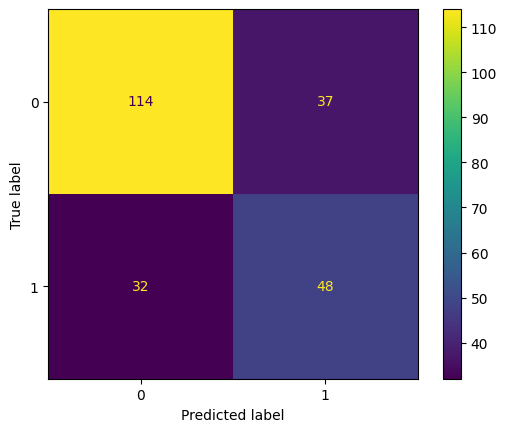

In [12]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [13]:
# Recall
# tp / (tp + fn)
48 / (48 + 32)

0.6

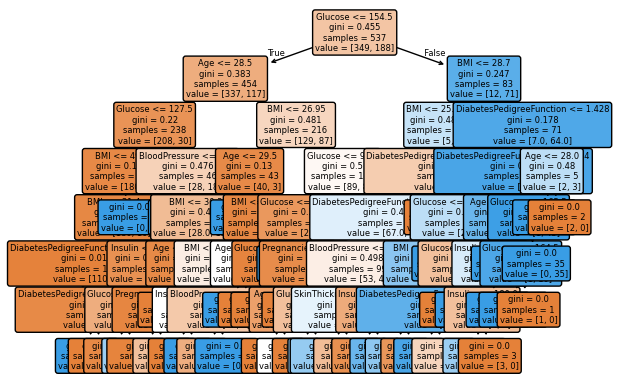

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names = list(X.columns), filled = True, fontsize = 6, rounded = True)

plt.show()
plt.savefig("tree.svg")